In [23]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv(r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\DATASET-balanced.csv")
print(df.columns)

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')


MFCC--> ses sinyalinin frekans algısını temsil eder
(konuşma,tonlama,taklit seslerde kullanırı)

Chroma_stft --> ses sinyalinin nota içeriğini temsil eder
ses notalarının yoğunluğuna bakar
deepfake seslerde daha az veya tutarsız 
müzikal yapı hakkında bilgi

Spectral_centroid-->frekansların nerde yoğunlaştığını gösterir yüksekse=tiz
düşükse=kalın
müzik türü sınıflandırmalarında kullanılır

Rms-->ses sinyalinin anlık enerji seviyesi ölçülür
Ses analizinde ve sinyal işlemede çok yaygın   olarak kullanılır.

Spectral_bandwidth-->frekansın genişliğini gösterir
yüksek=karışık,gürültülü ses
düşük=temiz,saade

rolloff-->müzikte ses kalite ölçümünde kullanılır

zero_crossing_rate-->yüksek=gürültülü tiz yani sinyal çok sık değişiiyor
düşük=pürüzsüz sinyal kalın,düzgün ses
konuşma ve sessizlik algılama

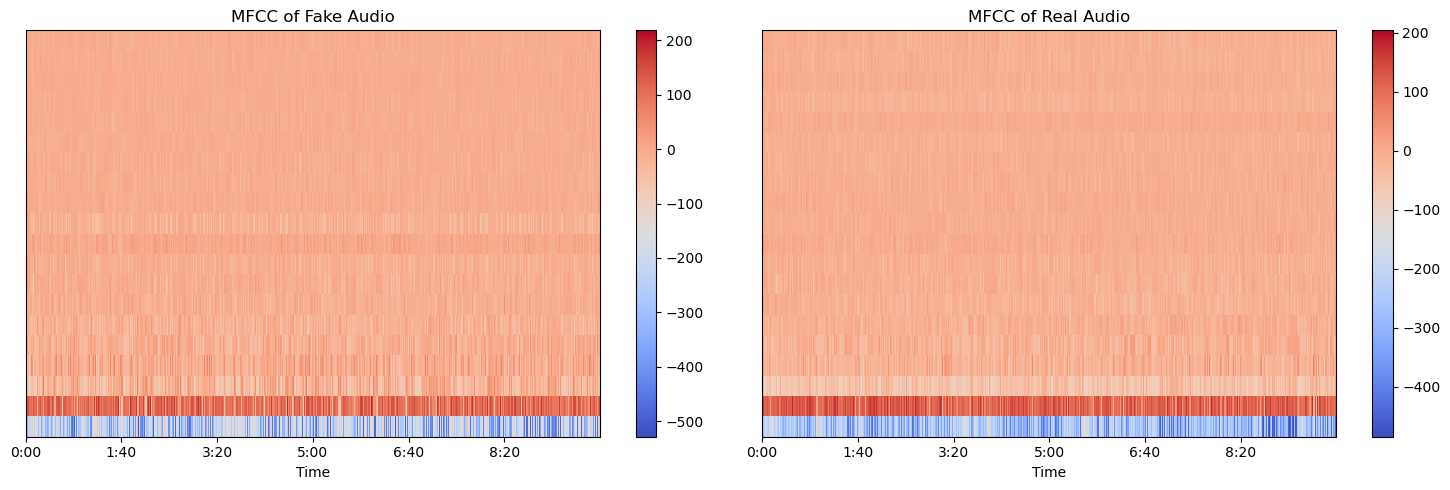

MFCC farkı: (20, 25840)


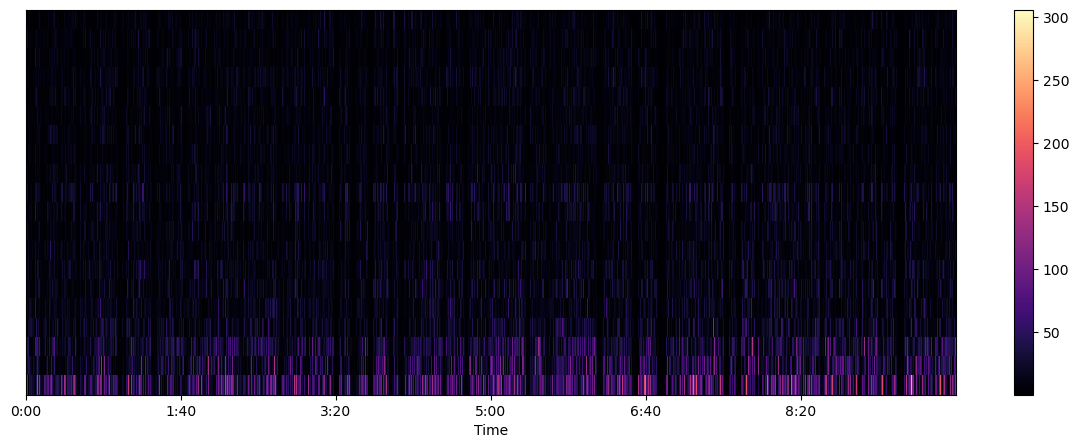

In [25]:

import numpy as np
ses = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\FAKE\biden-to-linus.wav"
y, sr = librosa.load(ses)
ses2 = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\REAL\biden-original.wav"
y2, sr2 = librosa.load(ses2)
mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20)
mfcc2=librosa.feature.mfcc(y=y2,sr=sr2,n_mfcc=20)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC of Fake Audio')
plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc2, x_axis='time', sr=sr2)
plt.colorbar()
plt.title('MFCC of Real Audio')
plt.tight_layout()
plt.show()
mfcc_fark=np.abs(mfcc-mfcc2)
plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_fark,x_axis='time')
plt.colorbar()
print("MFCC farkı:", mfcc_fark.shape)
#seste hangi frekansların daha baskın olduğunu gösterir
#her ses için anlık değişen 20 mfcc katsayısı çıkarıyor


12-20 MFCC katsayısı arası konuşma içeriği hakkında bilgileri içerir

İlk ses dosyasının chroma şekli: (12, 1292)
İlk ses dosyasının süresi: 30.00 saniye


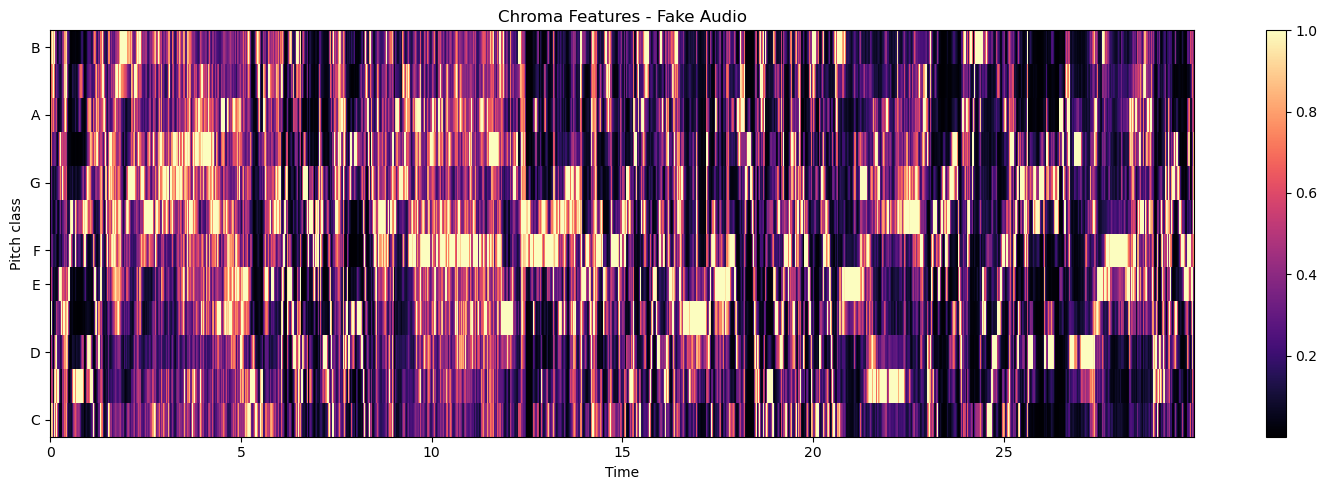

İkinci ses dosyasının chroma şekli: (12, 1292)
İkinci ses dosyasının süresi: 30.00 saniye


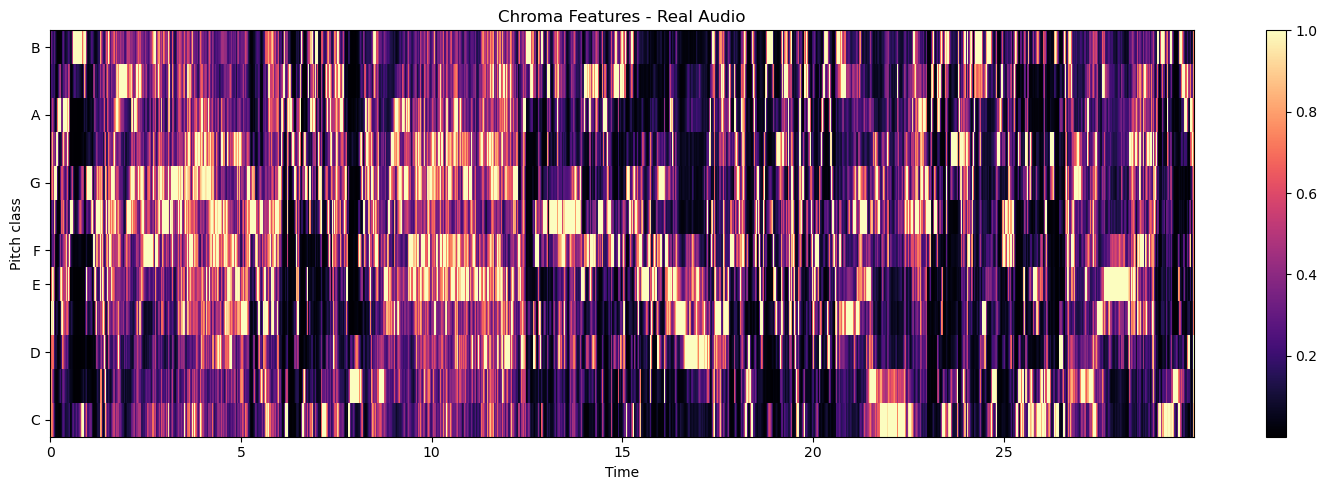

In [26]:
ses = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\FAKE\biden-to-linus.wav"
y, sr = librosa.load(ses)
analysis_duration = 30 
y_30 = y[:sr * analysis_duration]
chroma1 = librosa.feature.chroma_stft(y=y_30, sr=sr)
print(f"İlk ses dosyasının chroma şekli: {chroma1.shape}")
print(f"İlk ses dosyasının süresi: {librosa.get_duration(y=y_30, sr=sr):.2f} saniye")
plt.figure(figsize=(15, 5)) 
librosa.display.specshow(chroma1, y_axis="chroma", x_axis="time", sr=sr)
plt.colorbar()
plt.title('Chroma Features - Fake Audio')
plt.tight_layout()
plt.show()

ses2 = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\REAL\biden-original.wav"
y2, sr2 = librosa.load(ses2)
y2_30 = y2[:sr2 * analysis_duration]
chroma2 = librosa.feature.chroma_stft(y=y2_30, sr=sr2)
print(f"İkinci ses dosyasının chroma şekli: {chroma2.shape}")
print(f"İkinci ses dosyasının süresi: {librosa.get_duration(y=y2_30, sr=sr2):.2f} saniye")
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma2, y_axis="chroma", x_axis="time", sr=sr2) 
plt.colorbar()
plt.title('Chroma Features - Real Audio')
plt.tight_layout()
plt.show() # İkinci grafiği göster



İnsan sesinin notalar arası geçişi daha doğaldır

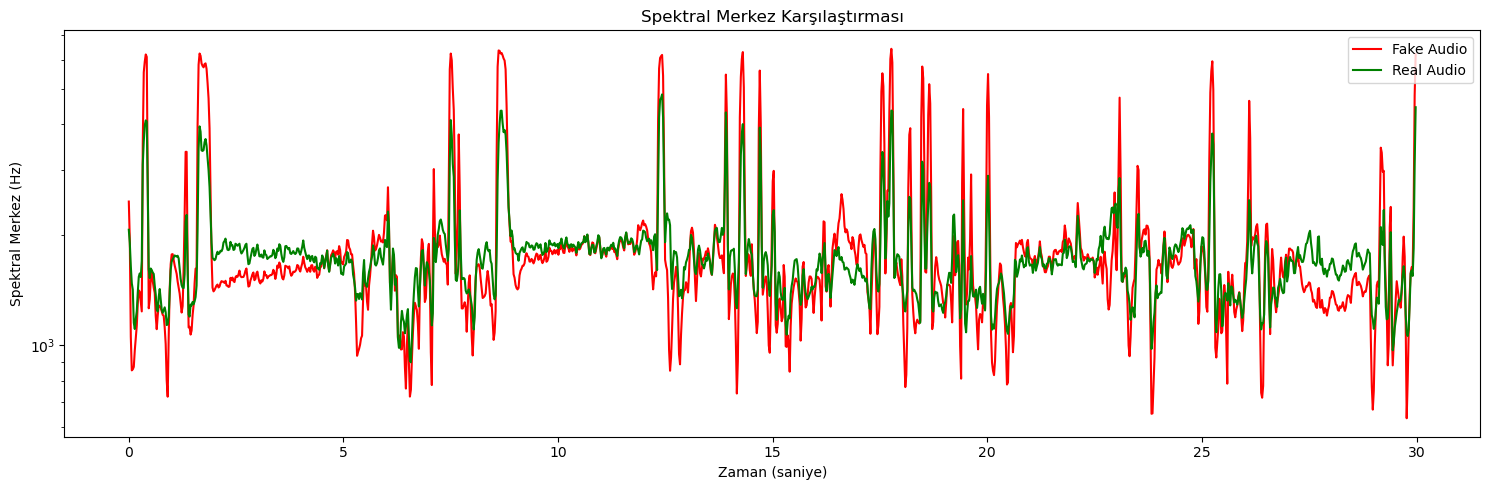

In [27]:
import librosa
import matplotlib.pyplot as plt

analysis_duration = 30 
y_30 = y[:sr * analysis_duration]
spec_cent = librosa.feature.spectral_centroid(y=y_30, sr=sr)
y2_30 = y2[:sr2 * analysis_duration]
spec_cent2 = librosa.feature.spectral_centroid(y=y2_30, sr=sr2)
frames = range(len(spec_cent[0]))
t = librosa.frames_to_time(frames, sr=sr)
plt.figure(figsize=(15, 5))
plt.semilogy(t, spec_cent[0], label='Fake Audio', color='r')
plt.semilogy(t, spec_cent2[0], label='Real Audio', color='g')
plt.xlabel("Zaman (saniye)")
plt.ylabel("Spektral Merkez (Hz)")
plt.title("Spektral Merkez Karşılaştırması")
plt.legend()
plt.tight_layout()
plt.show()


sesin tizlik grafiği

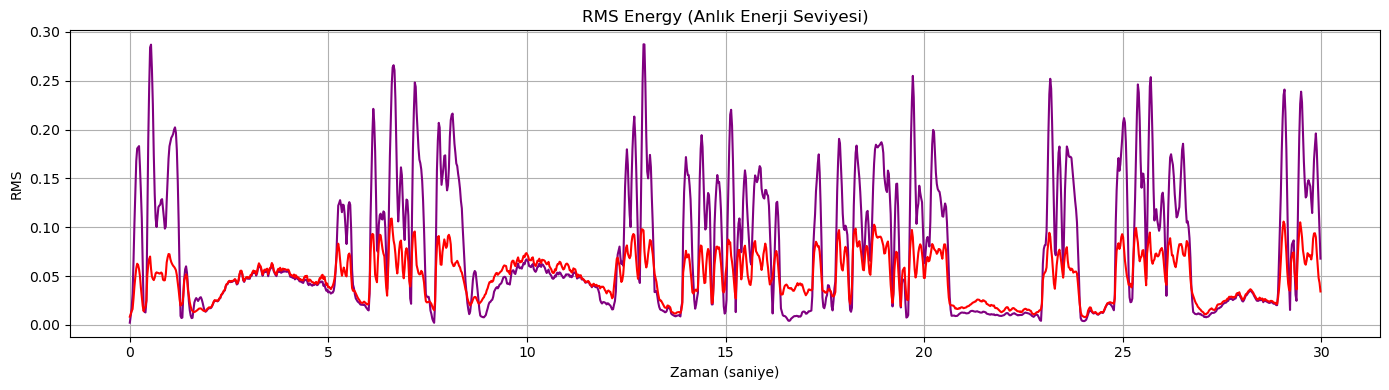

In [28]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Ses dosyasını yükle (örnek: ilk 60 saniye)


# RMS (enerji) hesapla
rms = librosa.feature.rms(y=y_30)
rms2 = librosa.feature.rms(y=y2_30)
# Zaman ekseni oluştur (frame başına bir zaman noktası)
frames = range(rms.shape[1])
t = librosa.frames_to_time(range(rms.shape[1]), sr=sr)
t2 = librosa.frames_to_time(range(rms2.shape[1]), sr=sr2)

# Grafik
plt.figure(figsize=(14, 4))
plt.plot(t, rms[0], color='purple')
plt.plot(t, rms2[0], color='red')
plt.title('RMS Energy (Anlık Enerji Seviyesi)')
plt.ylabel('RMS')
plt.xlabel('Zaman (saniye)')
plt.grid(True)
plt.tight_layout()
plt.show()





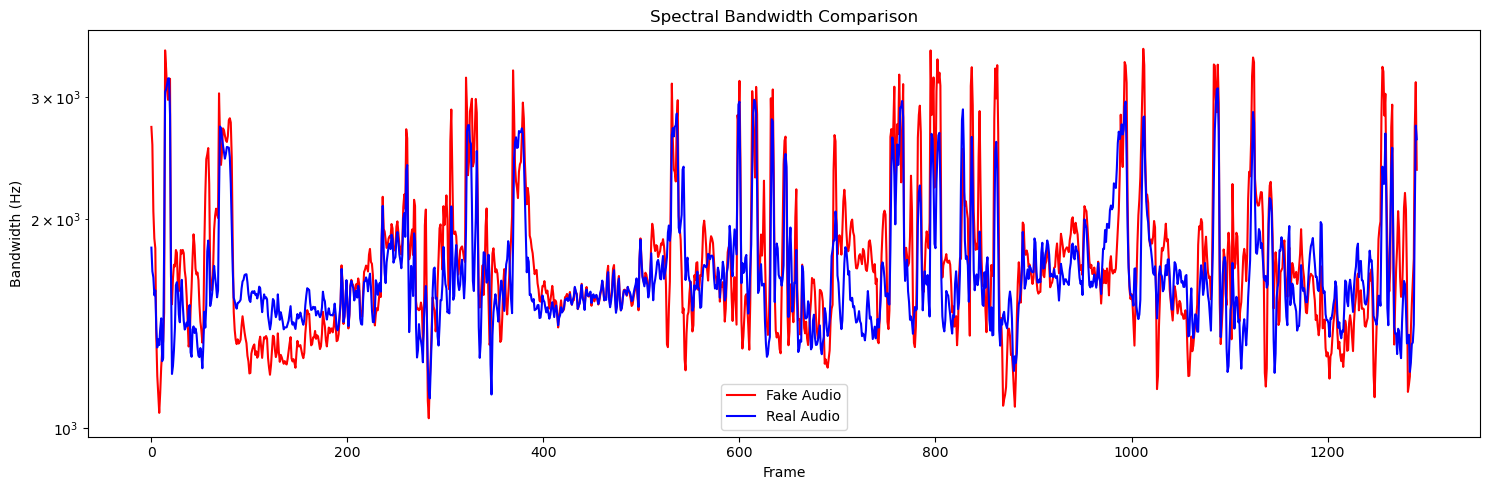

In [29]:
spec_band_fake = librosa.feature.spectral_bandwidth(y=y_30, sr=sr)
spec_band_real = librosa.feature.spectral_bandwidth(y=y2_30, sr=sr2)
plt.figure(figsize=(15, 5))
plt.semilogy(spec_band_fake.T, label='Fake Audio', color='r')
plt.semilogy(spec_band_real.T, label='Real Audio', color='b')
plt.title('Spectral Bandwidth Comparison')
plt.ylabel('Bandwidth (Hz)')
plt.xlabel('Frame')
plt.legend()
plt.tight_layout()
plt.show()

gerçek seslerde adım adım ses frekansı yükselirken
sahte seslerdeçok sabit veya ani sıçramalar yaşanabilir

In [30]:
df = pd.read_csv(r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\DATASET-balanced.csv")
print(df.head())
print(df["LABEL"].value_counts())

   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.311272  19.073769  24.046888  ...   
1            0.047730 -409.413422  120.348808  -7.161531   5.114784  ...   
2            0.080342 -318.996033  120.490273 -24.625771  23.891073  ...   
3            0.047180 -404.636749  136.320908   2.308172  -3.907071  ...   
4            0.051905 -410.497925  152.731400 -18.266771  51.993462  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17 

In [31]:
X=df.drop("LABEL", axis=1).values
y=df["LABEL"].values

In [32]:

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

In [34]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [35]:
X_train_seq = X_train.reshape(X_train.shape[0], 13, 2)#(örnek sayısı,13 grup,2 özellik)
X_test_seq = X_test.reshape(X_test.shape[0], 13, 2)


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(13, 2)),
    layers.BatchNormalization(),#modelin daha hızlı öğrenmesini sağlar overfit engeller
    layers.MaxPooling1D(pool_size=2),
    
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.LSTM(32, return_sequences=False),#son katman LSTM olduğu için return_sequences=False
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 13, 32)         │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 6, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,794 (77.32 KB)

 Trainable params: 19,602 (76.57 KB)

 Non-trainable params: 192 (768.00 B)

In [37]:
history = model.fit(
    X_train_seq, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_seq, y_test),
    callbacks=[early_stop]
)

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8611 - loss: 0.3472 - val_accuracy: 0.9717 - val_loss: 0.1658
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9856 - loss: 0.0567 - val_accuracy: 0.9864 - val_loss: 0.0387
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9865 - loss: 0.0403 - val_accuracy: 0.9850 - val_loss: 0.0450
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9907 - val_loss: 0.0273
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9921 - val_loss: 0.0272
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9955 - loss: 0.0136 - val_accuracy: 0.9890 - val_loss: 0.0365
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9875 - val_loss: 0.0485
Epoch 8/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9972 - loss: 0.0095 - val_acc

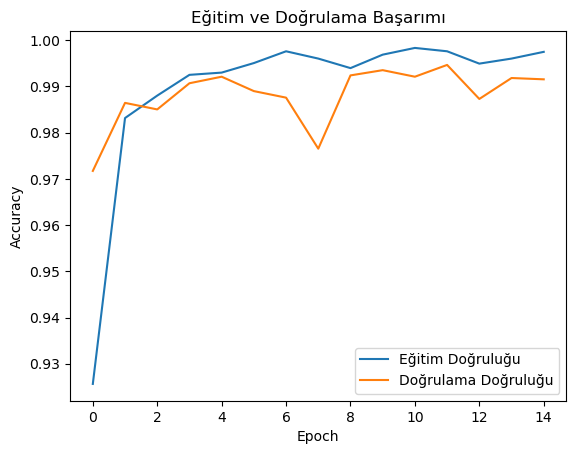

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Eğitim ve Doğrulama Başarımı')
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[1780   14]
 [   9 1731]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1794
           1       0.99      0.99      0.99      1740

    accuracy                           0.99      3534
   macro avg       0.99      0.99      0.99      3534
weighted avg       0.99      0.99      0.99      3534



In [40]:
model.save("deepfake_voice_detector.h5")

In [41]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 20)
visualkeras.layered_view(
    model,
    legend=True,
    draw_volume=True,
    spacing=30,          # katmanlar arası boşluk
    scale_xy=3,          # genişlik (x) ve yükseklik (y) ölçeklemesi
    scale_z=1,           # derinlik ölçeklemesi (Conv1D için düşük tut)
    font=font
).show()

c:\Users\HP\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


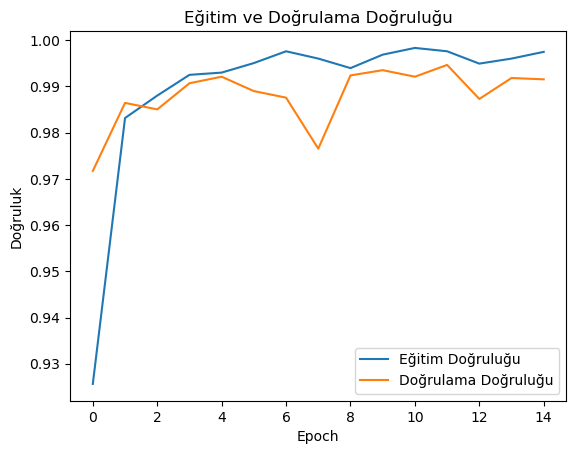

In [42]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluklarını görselleştir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

In [ ]:

def extract_features(filename):
    y, sr = librosa.load(filename, sr=None)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    rms = np.mean(librosa.feature.rms(y=y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)  # Flatten MFCCs to 1D (mean of each coefficient)
    # Combine all features in the same order as your training data
    features = np.hstack([
        chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfccs_mean
    ])
    return features

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("encoder.pkl", "rb") as f:
    encoder = pickle.load(f)
    
def detect_fake(filename):
    features = extract_features(filename)
    features = features.reshape(1, -1)
    features_scaled = scaler.transform(features)
    features_seq = features_scaled.reshape(1, 13, 2)
    model = tf.keras.models.load_model("deepfake_voice_detector.h5")
    result_array = model.predict(features_seq)
    print("Model output (softmax):", result_array)
    result_classes = list(encoder.classes_)
    result = np.argmax(result_array[0])
    print("Result:", result_classes[result])
    

test_real = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\REAL\obama-original.wav"
detect_fake(test_real)
test_fake = r"C:\Users\HP\Desktop\AI\Data\raw\KAGGLE\AUDIO\FAKE\obama-to-taylor.wav"
detect_fake(test_fake)
test_=r"C:\Users\HP\Desktop\ecem_output_20250510_140109_bugünyineyağmur.wav"
detect_fake(test_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
Model output (softmax): [[1.441491e-07 9.999999e-01]]
Result: REAL


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Model output (softmax): [[1.0000000e+00 3.3697663e-08]]
Result: FAKE


In [44]:
import numpy as np

train_sample = np.array([
    3.38055000e-01, 2.79480000e-02, 2.84294887e+03, 4.32291676e+03,
    6.57058619e+03, 4.10500000e-02, -4.62169586e+02, 9.03112720e+01,
    1.90737690e+01, 2.40468880e+01, -9.26060000e-02, 5.96393300e+00,
    -1.20731190e+01, -1.52692500e+00, -6.73584500e+00, -9.34483100e+00,
    -1.41818950e+01, -6.68656400e+00, 9.02086000e-01, -7.25155100e+00,
    -1.19834200e+00, 4.74740300e+00, -4.98627900e+00, 9.53935000e-01,
    -5.01313800e+00, -6.77906000e+00
])  # CSV’den alınan satır

test_sample = np.array([
    3.52635980e-01, 9.50365290e-02, 2.15612762e+03, 2.62429396e+03,
    3.53164781e+03, 5.51729657e-02, -3.00318024e+02, 1.20797661e+02,
    -1.53557167e+01, -4.45323277e+00, -7.28313828e+00, -3.82508826e+00,
    -1.86512928e+01, -1.06865530e+01, -6.42433596e+00, -9.69685364e+00,
    -5.38702297e+00, -2.35604620e+00, -8.35238361e+00, -5.81040907e+00,
    -1.91701794e+00, -8.38657284e+00, -8.52050591e+00, -6.30624390e+00,
    -1.05603971e+01, -1.11353865e+01
])  # extract_features çıktısı

dist = np.linalg.norm(train_sample - test_sample)
print(f"Vektörler arası fark: {dist:.4f}")

print("Eğitim veri örneği:", X[0])
print("extract_features ile aynı dosyanın çıktısı:", extract_features(test_fake))

Vektörler arası fark: 3552.7537
Eğitim veri örneği: [ 3.38055000e-01  2.79480000e-02  2.84294887e+03  4.32291676e+03
  6.57058619e+03  4.10500000e-02 -4.62169586e+02  9.03112720e+01
  1.90737690e+01  2.40468880e+01 -9.26060000e-02  5.96393300e+00
 -1.20731190e+01 -1.52692500e+00 -6.73584500e+00 -9.34483100e+00
 -1.41818950e+01 -6.68656400e+00  9.02086000e-01 -7.25155100e+00
 -1.19834200e+00  4.74740300e+00 -4.98627900e+00  9.53935000e-01
 -5.01313800e+00 -6.77906000e+00]
extract_features ile aynı dosyanın çıktısı: [ 4.48393196e-01  4.36986499e-02  3.95126300e+03  3.82797959e+03
  7.59025827e+03  1.08462298e-01 -3.65791565e+02  8.44728394e+01
 -2.28152542e+01  1.56423063e+01 -7.82794857e+00 -2.49451280e+00
 -1.58448334e+01  1.09542668e+00 -3.06863666e+00 -5.77963972e+00
 -1.27383733e+00 -2.62488937e+00 -2.92457461e+00 -4.44456530e+00
 -2.01658583e+00 -5.59456635e+00 -2.15851665e+00 -4.14008474e+00
 -7.95252562e+00 -6.84226799e+00]
